In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv("extracted_data_cve_key_data.csv")

# Display the first few rows of the dataframe
print(df.head())


          CVE ID Source Identifier           Published Date  \
0  CVE-1999-0001     cve@mitre.org  1999-12-30T05:00:00.000   
1  CVE-1999-0002     cve@mitre.org  1998-10-12T04:00:00.000   
2  CVE-1999-0003     cve@mitre.org  1998-04-01T05:00:00.000   
3  CVE-1999-0004     cve@mitre.org  1997-12-16T05:00:00.000   
4  CVE-1999-0005     cve@mitre.org  1998-07-20T04:00:00.000   

        Last Modified Date Vulnerability Status  \
0  2010-12-16T05:00:00.000             Analyzed   
1  2009-01-26T05:00:00.000             Analyzed   
2  2018-10-30T16:26:22.357             Analyzed   
3  2018-10-12T21:29:02.120             Modified   
4  2008-09-09T12:33:31.117             Analyzed   

                                         Description  CVSS Score  \
0  ip_input.c in BSD-derived TCP/IP implementatio...         5.0   
1  Buffer overflow in NFS mountd gives root acces...        10.0   
2  Execute commands as root via buffer overflow i...        10.0   
3  MIME buffer overflow in email clients, 

In [15]:
df

,CVE ID,Source Identifier,Published Date,Last Modified Date,Vulnerability Status,Description,CVSS Score,Weaknesses,Configuration,References
0,CVE-1999-0001,cve@mitre.org,1999-12-30T05:00:00.000,2010-12-16T05:00:00.000,Analyzed,ip_input.c in BSD-derived TCP/IP implementatio...,5.0,CWE-20,cpe:2.3:o:bsdi:bsd_os:3.1:*:*:*:*:*:*:*; cpe:2...,http://www.openbsd.org/errata23.html#tcpfix; h...
1,CVE-1999-0002,cve@mitre.org,1998-10-12T04:00:00.000,2009-01-26T05:00:00.000,Analyzed,Buffer overflow in NFS mountd gives root acces...,10.0,CWE-119,cpe:2.3:o:bsdi:bsd_os:1.1:*:*:*:*:*:*:*; cpe:2...,ftp://patches.sgi.com/support/free/security/ad...
2,CVE-1999-0003,cve@mitre.org,1998-04-01T05:00:00.000,2018-10-30T16:26:22.357,Analyzed,Execute commands as root via buffer overflow i...,10.0,NVD-CWE-Other,cpe:2.3:a:tritreal:ted_cde:4.3:*:*:*:*:*:*:*; ...,ftp://patches.sgi.com/support/free/security/ad...
3,CVE-1999-0004,cve@mitre.org,1997-12-16T05:00:00.000,2018-10-12T21:29:02.120,Modified,"MIME buffer overflow in email clients, e.g. So...",5.0,NVD-CWE-Other,cpe:2.3:a:hp:dtmail:*:*:*:*:*:*:*:*; cpe:2.3:a...,https://docs.microsoft.com/en-us/security-upda...
4,CVE-1999-0005,cve@mitre.org,1998-07-20T04:00:00.000,2008-09-09T12:33:31.117,Analyzed,Arbitrary command execution via IMAP buffer ov...,10.0,NVD-CWE-Other,cpe:2.3:a:netscape:messaging_server:3.55:*:*:*...,http://sunsolve.sun.com/pub-cgi/retrieve.pl?do...
...,...,...,...,...,...,...,...,...,...,...
238603,CVE-2024-27133,reefs@jfrog.com,2024-02-23T22:15:55.287,2024-02-23T22:15:55.287,Received,Insufficient sanitization in MLflow leads to X...,NaN,CWE-79,NaN,https://github.com/mlflow/mlflow/pull/10893; h...
238604,CVE-2024-27215,cve@mitre.org,2024-02-21T16:15:50.657,2024-02-21T18:15:52.060,Rejected,Rejected reason: DO NOT USE THIS CANDIDATE NUM...,NaN,NaN,NaN,NaN
238605,CVE-2024-27283,cve@mitre.org,2024-02-22T05:15:10.087,2024-02-22T19:07:27.197,Awaiting Analysis,A vulnerability was discovered in Veritas eDis...,NaN,NaN,NaN,https://www.veritas.com/support/en_US/security...
238606,CVE-2024-27318,6f8de1f0-f67e-45a6-b68f-98777fdb759c,2024-02-23T18:15:50.767,2024-02-23T19:31:25.817,Awaiting Analysis,Versions of the package onnx before and includ...,NaN,CWE-22,NaN,https://github.com/onnx/onnx/commit/66b7fb6309...


In [16]:
df.shape

(238608, 10)

In [17]:
!pip install pinecone

In [18]:
import pandas as pd
import re
import requests
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from datetime import datetime
import json
import pinecone
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk import word_tokenize, pos_tag, ne_chunk


In [19]:
# Initialize NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imaba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\imaba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\imaba\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\imaba\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [20]:
# Define stop words and stemmer
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

In [21]:
# Step 1: Data Collection (Assuming CSV data is already downloaded)
# Load the CVE data CSV file
df = pd.read_csv("extracted_data_cve_key_data.csv")

In [22]:
# Step 2: Data Preprocessing
# Preprocessing function for text fields
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    text = ' '.join([ps.stem(word) for word in text.split() if word not in stop_words])
    return text

In [23]:

# Apply preprocessing to textual columns
for column in ['Description', 'Weaknesses', 'Configuration', 'References']:
    df[column] = df[column].apply(preprocess_text)

In [24]:
# Standardize 'CVE ID' and 'Source Identifier'
df['CVE ID'] = df['CVE ID'].str.upper().str.strip()
df['Source Identifier'] = df['Source Identifier'].str.strip()
df['Vulnerability Status'] = df['Vulnerability Status'].str.lower().str.strip()


In [25]:
# Convert 'CVSS Score' to numeric
df['CVSS Score'] = pd.to_numeric(df['CVSS Score'], errors='coerce')

In [26]:
# Convert date fields to datetime
df['Published Date'] = pd.to_datetime(df['Published Date'], errors='coerce')
df['Last Modified Date'] = pd.to_datetime(df['Last Modified Date'], errors='coerce')

In [27]:
# Drop rows missing critical information
df.dropna(subset=['CVE ID', 'Source Identifier', 'Description'], inplace=True)

In [28]:
# Save preprocessed data for further analysis
df.to_csv("cve_data_preprocessed.csv", index=False)

print("Data Preprocessing Complete!")

Data Preprocessing Complete!


In [29]:
df

,CVE ID,Source Identifier,Published Date,Last Modified Date,Vulnerability Status,Description,CVSS Score,Weaknesses,Configuration,References
0,CVE-1999-0001,cve@mitre.org,1999-12-30 05:00:00.000,2010-12-16 05:00:00.000,analyzed,ip_inputc bsdderiv tcpip implement allow remot...,5.0,cwe,cpeobsdibsd_o cpeofreebsdfreebsd cpeofreebsdfr...,httpwwwopenbsdorgerratahtmltcpfix httpwwwosvdborg
1,CVE-1999-0002,cve@mitre.org,1998-10-12 04:00:00.000,2009-01-26 05:00:00.000,analyzed,buffer overflow nf mountd give root access rem...,10.0,cwe,cpeobsdibsd_o cpeocalderaopenlinux cpeoredhatl...,ftppatchessgicomsupportfreesecurityadvisoriesi...
2,CVE-1999-0003,cve@mitre.org,1998-04-01 05:00:00.000,2018-10-30 16:26:22.357,analyzed,execut command root via buffer overflow toolta...,10.0,nvdcweother,cpeatritrealted_cd cpeosgiirix cpeosgiirix cpe...,ftppatchessgicomsupportfreesecurityadvisoriesa...
3,CVE-1999-0004,cve@mitre.org,1997-12-16 05:00:00.000,2018-10-12 21:29:02.120,modified,mime buffer overflow email client eg solari ma...,5.0,nvdcweother,cpeahpdtmail cpeauniversity_of_washingtonpin c...,httpsdocsmicrosoftcomenussecurityupdatessecuri...
4,CVE-1999-0005,cve@mitre.org,1998-07-20 04:00:00.000,2008-09-09 12:33:31.117,analyzed,arbitrari command execut via imap buffer overf...,10.0,nvdcweother,cpeanetscapemessaging_serv cpeauniversity_of_w...,httpsunsolvesuncompubcgiretrievepldoctypecolld...
...,...,...,...,...,...,...,...,...,...,...
238603,CVE-2024-27133,reefs@jfrog.com,2024-02-23 22:15:55.287,2024-02-23 22:15:55.287,received,insuffici sanit mlflow lead xss run recip use ...,NaN,cwe,,httpsgithubcommlflowmlflowpul httpsresearchjfr...
238604,CVE-2024-27215,cve@mitre.org,2024-02-21 16:15:50.657,2024-02-21 18:15:52.060,rejected,reject reason use candid number consultid cve ...,NaN,,,
238605,CVE-2024-27283,cve@mitre.org,2024-02-22 05:15:10.087,2024-02-22 19:07:27.197,awaiting analysis,vulner discov verita ediscoveri platform appli...,NaN,,,httpswwwveritascomsupporten_ussecurityvt
238606,CVE-2024-27318,6f8de1f0-f67e-45a6-b68f-98777fdb759c,2024-02-23 18:15:50.767,2024-02-23 19:31:25.817,awaiting analysis,version packag onnx includ vulner directori tr...,NaN,cwe,,httpsgithubcomonnxonnxcommitbfbfdcfebbddea htt...


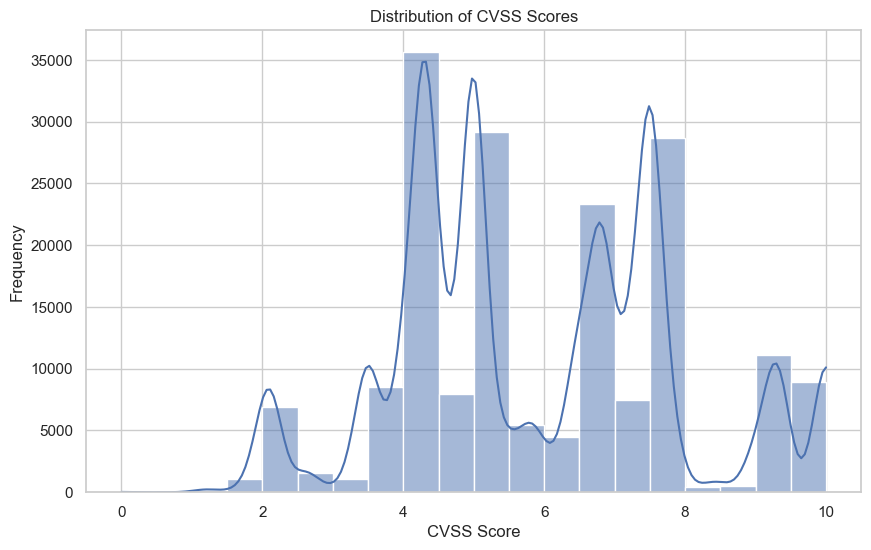

C:\Users\imaba\AppData\Local\Temp\ipykernel_26736\1060323871.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')


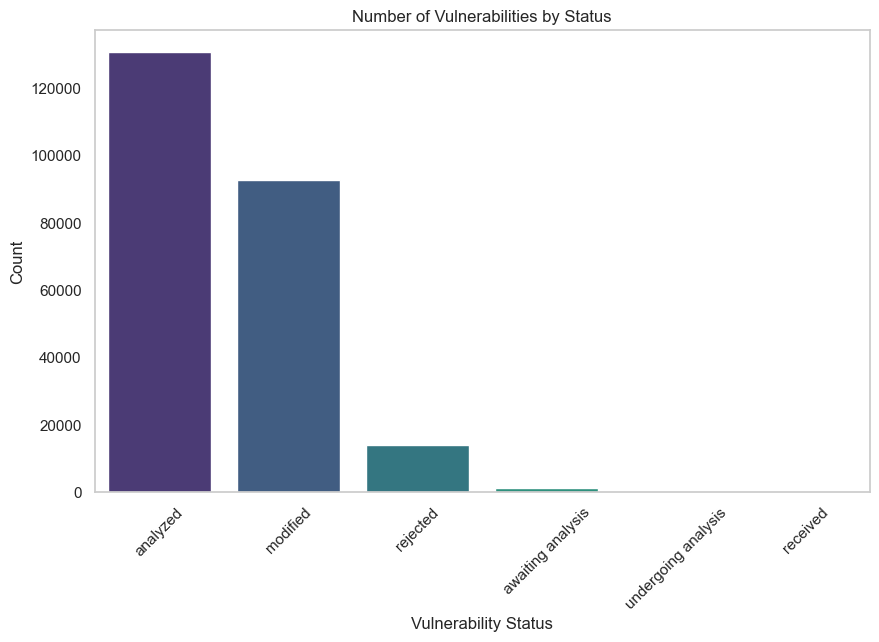

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Visualize the distribution of CVSS Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['CVSS Score'].dropna(), bins=20, kde=True)
plt.title('Distribution of CVSS Scores')
plt.xlabel('CVSS Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Count the number of vulnerabilities per status
status_counts = df['Vulnerability Status'].value_counts()

# Visualize the number of vulnerabilities per status
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')
plt.title('Number of Vulnerabilities by Status')
plt.xlabel('Vulnerability Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [31]:
# Step 3: Information Extraction (Using Named Entity Recognition)
def extract_entities(text):
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    entities = ne_chunk(tagged)
    return entities

In [32]:
import nltk
nltk.download('words')
nltk.download('maxent_ne_chunker')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\imaba\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\imaba\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\imaba\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\imaba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
import spacy

# Load the spaCy model (download if necessary)
nlp = spacy.load("en_core_web_sm")

# Function to extract named entities
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply NER on the 'Description' column
df['Entities'] = df['Description'].apply(extract_entities)


 Dependency Parsing

In [34]:
def parse_dependencies(text):
    doc = nlp(text)
    dependencies = [(token.text, token.dep_, token.head.text) for token in doc]
    return dependencies

# Apply dependency parsing on the 'Description' column
df['Dependencies'] = df['Description'].apply(parse_dependencies)


Text Classification

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Example predefined categories (could be extracted from your data)
categories = ['vulnerability', 'exploit', 'patch', 'configuration']

# Create TF-IDF vectors for categories
vectorizer = TfidfVectorizer()
category_vectors = vectorizer.fit_transform(categories)

# Function to classify based on similarity to predefined categories
def classify_description(description):
    description_vector = vectorizer.transform([description])
    cosine_similarities = cosine_similarity(description_vector, category_vectors)
    most_similar_index = cosine_similarities.argmax()
    return categories[most_similar_index]

# Apply classification
df['Category'] = df['Description'].apply(classify_description)


In [36]:
# Save the DataFrame to a CSV file
output_file = 'cve_data_with_categories.csv'  # Specify your desired output file name
df.to_csv(output_file, index=False)  # Save the DataFrame without row indices

print(f'DataFrame saved to {output_file}')

DataFrame saved to cve_data_with_categories.csv


In [37]:
df

,CVE ID,Source Identifier,Published Date,Last Modified Date,Vulnerability Status,Description,CVSS Score,Weaknesses,Configuration,References,Entities,Dependencies,Category
0,CVE-1999-0001,cve@mitre.org,1999-12-30 05:00:00.000,2010-12-16 05:00:00.000,analyzed,ip_inputc bsdderiv tcpip implement allow remot...,5.0,cwe,cpeobsdibsd_o cpeofreebsdfreebsd cpeofreebsdfr...,httpwwwopenbsdorgerratahtmltcpfix httpwwwosvdborg,[],"[(ip_inputc, compound, bsdderiv), (bsdderiv, c...",vulnerability
1,CVE-1999-0002,cve@mitre.org,1998-10-12 04:00:00.000,2009-01-26 05:00:00.000,analyzed,buffer overflow nf mountd give root access rem...,10.0,cwe,cpeobsdibsd_o cpeocalderaopenlinux cpeoredhatl...,ftppatchessgicomsupportfreesecurityadvisoriesi...,"[(mostli, ORG)]","[(buffer, compound, overflow), (overflow, comp...",vulnerability
2,CVE-1999-0003,cve@mitre.org,1998-04-01 05:00:00.000,2018-10-30 16:26:22.357,analyzed,execut command root via buffer overflow toolta...,10.0,nvdcweother,cpeatritrealted_cd cpeosgiirix cpeosgiirix cpe...,ftppatchessgicomsupportfreesecurityadvisoriesa...,[],"[(execut, ROOT, execut), (command, compound, r...",vulnerability
3,CVE-1999-0004,cve@mitre.org,1997-12-16 05:00:00.000,2018-10-12 21:29:02.120,modified,mime buffer overflow email client eg solari ma...,5.0,nvdcweother,cpeahpdtmail cpeauniversity_of_washingtonpin c...,httpsdocsmicrosoftcomenussecurityupdatessecuri...,[],"[(mime, compound, overflow), (buffer, compound...",vulnerability
4,CVE-1999-0005,cve@mitre.org,1998-07-20 04:00:00.000,2008-09-09 12:33:31.117,analyzed,arbitrari command execut via imap buffer overf...,10.0,nvdcweother,cpeanetscapemessaging_serv cpeauniversity_of_w...,httpsunsolvesuncompubcgiretrievepldoctypecolld...,[],"[(arbitrari, compound, command), (command, nsu...",vulnerability
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238603,CVE-2024-27133,reefs@jfrog.com,2024-02-23 22:15:55.287,2024-02-23 22:15:55.287,received,insuffici sanit mlflow lead xss run recip use ...,NaN,cwe,,httpsgithubcommlflowmlflowpul httpsresearchjfr...,"[(insuffici sanit mlflow, ORG), (xss, GPE), (j...","[(insuffici, compound, sanit), (sanit, nsubj, ...",vulnerability
238604,CVE-2024-27215,cve@mitre.org,2024-02-21 16:15:50.657,2024-02-21 18:15:52.060,rejected,reject reason use candid number consultid cve ...,NaN,,,,[],"[(reject, csubj, refer), (reason, nsubj, use),...",vulnerability
238605,CVE-2024-27283,cve@mitre.org,2024-02-22 05:15:10.087,2024-02-22 19:07:27.197,awaiting analysis,vulner discov verita ediscoveri platform appli...,NaN,,,httpswwwveritascomsupporten_ussecurityvt,"[(verita ediscoveri, PERSON), (applic administ...","[(vulner, npadvmod, discov), (discov, compound...",vulnerability
238606,CVE-2024-27318,6f8de1f0-f67e-45a6-b68f-98777fdb759c,2024-02-23 18:15:50.767,2024-02-23 19:31:25.817,awaiting analysis,version packag onnx includ vulner directori tr...,NaN,cwe,,httpsgithubcomonnxonnxcommitbfbfdcfebbddea htt...,"[(userprovid directori, PERSON)]","[(version, compound, onnx), (packag, compound,...",patch


In [38]:
pip install sentence-transformers flask pinecone-client pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [39]:
import pandas as pd
import re
import pinecone
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
from flask import Flask, jsonify

In [40]:
import sentence_transformers


In [41]:
PINECONE_API_KEY = "8c680ba0-9326-43f6-87fe-3aed27c23772cde0135b-6b53-4821-a40a-285e9e324347"
PINECONE_API_ENV = "us-east-1"
PINECONE_INDEX_NAME = "cve-index"


In [42]:
import os

In [43]:
# Set the Pinecone API key as an environment variable
os.environ["PINECONE_API_KEY"] = PINECONE_API_KEY

In [44]:
# Indexing in Pinecone
if PINECONE_INDEX_NAME not in pinecone.list_indexes():
    pinecone.create_index(PINECONE_INDEX_NAME, dimension=768)  # Change dimension based on your embedding model

AttributeError: list_indexes is no longer a top-level attribute of the pinecone package.

To use list_indexes, please create a client instance and call the method there instead.

Example:

    from pinecone import Pinecone
    
    pc = Pinecone(api_key='YOUR_API_KEY')

    index_name = "quickstart" # or your index name

    if index_name not in pc.list_indexes().names():
        # do something



In [11]:
import pandas as pd
import pinecone
from sentence_transformers import SentenceTransformer
from flask import Flask, jsonify

# Initialize Pinecone
PINECONE_API_KEY = "8c680ba0-9326-43f6-87fe-3aed27c23772cde0135b-6b53-4821-a40a-285e9e324347"
PINECONE_API_ENV = "us-east-1"
PINECONE_INDEX_NAME = "cve-index"

In [12]:
existing_indexes = pinecone.list_indexes()

AttributeError: list_indexes is no longer a top-level attribute of the pinecone package.

To use list_indexes, please create a client instance and call the method there instead.

Example:

    from pinecone import Pinecone
    
    pc = Pinecone(api_key='YOUR_API_KEY')

    index_name = "quickstart" # or your index name

    if index_name not in pc.list_indexes().names():
        # do something



In [ ]:
pinecone.init(api_key=PINECONE_API_KEY, environment=PINECONE_API_ENV)

In [4]:
pip install langchain-community

Note: you may need to restart the kernel to use updated packages.


In [6]:
import os
from langchain import PromptTemplate
from langchain.chains import RetrievalQA
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import Pinecone
from langchain.document_loaders import PyPDFLoader, DirectoryLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.llms import CTransformers
from pinecone import Pinecone, ServerlessSpec 
import pinecone

In [7]:
from langchain_pinecone import PineconeVectorStore

ModuleNotFoundError: No module named 'langchain_pinecone'

In [35]:
pinecone.init(api_key=PINECONE_API_KEY, environment=PINECONE_API_ENV)

AttributeError: init is no longer a top-level attribute of the pinecone package.

Please create an instance of the Pinecone class instead.

Example:

    import os
    from pinecone import Pinecone, ServerlessSpec

    pc = Pinecone(
        api_key=os.environ.get("PINECONE_API_KEY")
    )

    # Now do stuff
    if 'my_index' not in pc.list_indexes().names():
        pc.create_index(
            name='my_index', 
            dimension=1536, 
            metric='euclidean',
            spec=ServerlessSpec(
                cloud='aws',
                region='us-west-2'
            )
        )



In [34]:
# Check if the index exists; if not, create it
if PINECONE_INDEX_NAME not in pinecone.list_indexes():
    pinecone.create_index(PINECONE_INDEX_NAME, dimension=768) 

AttributeError: list_indexes is no longer a top-level attribute of the pinecone package.

To use list_indexes, please create a client instance and call the method there instead.

Example:

    from pinecone import Pinecone
    
    pc = Pinecone(api_key='YOUR_API_KEY')

    index_name = "quickstart" # or your index name

    if index_name not in pc.list_indexes().names():
        # do something



In [33]:
# Initialize Pinecone
pinecone.init(api_key='YOUR_PINECONE_API_KEY', environment='us-west1-gcp')
index_name = "cve-index"
if index_name not in pinecone.list_indexes():
    pinecone.create_index(index_name, dimension=768)  # Use the appropriate dimension for your embeddings
index = pinecone.Index(index_name)

AttributeError: init is no longer a top-level attribute of the pinecone package.

Please create an instance of the Pinecone class instead.

Example:

    import os
    from pinecone import Pinecone, ServerlessSpec

    pc = Pinecone(
        api_key=os.environ.get("PINECONE_API_KEY")
    )

    # Now do stuff
    if 'my_index' not in pc.list_indexes().names():
        pc.create_index(
            name='my_index', 
            dimension=1536, 
            metric='euclidean',
            spec=ServerlessSpec(
                cloud='aws',
                region='us-west-2'
            )
        )



In [22]:
'''import pandas as pd
import re
import requests
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from datetime import datetime
import json
import pinecone
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk import word_tokenize, pos_tag, ne_chunk

# Initialize NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Define stop words and stemmer
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

# Step 1: Data Collection (Assuming CSV data is already downloaded)
# Load the CVE data CSV file
df = pd.read_csv("cve_data.csv")

# Step 2: Data Preprocessing
# Preprocessing function for text fields
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    text = ' '.join([ps.stem(word) for word in text.split() if word not in stop_words])
    return text

# Apply preprocessing to textual columns
for column in ['Description', 'Weaknesses', 'Configuration', 'References']:
    df[column] = df[column].apply(preprocess_text)

# Standardize 'CVE ID' and 'Source Identifier'
df['CVE ID'] = df['CVE ID'].str.upper().str.strip()
df['Source Identifier'] = df['Source Identifier'].str.strip()
df['Vulnerability Status'] = df['Vulnerability Status'].str.lower().str.strip()

# Convert 'CVSS Score' to numeric
df['CVSS Score'] = pd.to_numeric(df['CVSS Score'], errors='coerce')

# Convert date fields to datetime
df['Published Date'] = pd.to_datetime(df['Published Date'], errors='coerce')
df['Last Modified Date'] = pd.to_datetime(df['Last Modified Date'], errors='coerce')

# Drop rows missing critical information
df.dropna(subset=['CVE ID', 'Source Identifier', 'Description'], inplace=True)

# Save preprocessed data for further analysis
df.to_csv("cve_data_preprocessed.csv", index=False)

print("Data Preprocessing Complete!")

# Step 3: Information Extraction (Using Named Entity Recognition)
def extract_entities(text):
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    entities = ne_chunk(tagged)
    return entities

# Apply NER on 'Description' column for demonstration
df['Entities'] = df['Description'].apply(extract_entities)

# Step 4: Text Classification (Using TF-IDF and Cosine Similarity)
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['Description'])

# Function to classify based on similarity
def classify_text(query):
    query_vector = vectorizer.transform([query])
    cosine_sim = cosine_similarity(query_vector, tfidf_matrix).flatten()
    most_similar_index = cosine_sim.argmax()
    return df.iloc[most_similar_index]

# Test Classification
sample_query = "remote code execution vulnerability in windows"
result = classify_text(sample_query)
print("Classification Result:", result[['CVE ID', 'Description']])

# Step 5: Store and Access Data in Pinecone for Fast Retrieval
pinecone.init(api_key="YOUR_PINECONE_API_KEY", environment="us-east-1")  # Replace with actual Pinecone API key

# Create a Pinecone index
index_name = "cve_index"
if index_name not in pinecone.list_indexes():
    pinecone.create_index(index_name, dimension=tfidf_matrix.shape[1])

# Connect to the index
index = pinecone.Index(index_name)

# Upsert (Upload) data to Pinecone index
for i, row in df.iterrows():
    vector = tfidf_matrix[i].toarray().flatten().tolist()
    metadata = {
        "CVE ID": row["CVE ID"],
        "Source Identifier": row["Source Identifier"],
        "Published Date": str(row["Published Date"]),
        "Description": row["Description"]
    }
    index.upsert([(row["CVE ID"], vector, metadata)])

# Step 6: Advanced Analysis - Trend Analysis (e.g., CVSS Score Trend Over Time)
trend_data = df[['Published Date', 'CVSS Score']].dropna()
trend_data.set_index('Published Date', inplace=True)
trend_data = trend_data.resample('Y').mean()  # Annual average CVSS score

# Plotting (Optional)
import matplotlib.pyplot as plt
plt.plot(trend_data.index, trend_data['CVSS Score'], marker='o')
plt.title("Average CVSS Score Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Average CVSS Score")
plt.show()

print("Pipeline Completed!")


isko dekhna ek bbare preprocessing tk'''

'import pandas as pd\nimport re\nimport requests\nfrom nltk.corpus import stopwords\nfrom nltk.stem import PorterStemmer\nfrom datetime import datetime\nimport json\nimport pinecone\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nfrom sklearn.metrics.pairwise import cosine_similarity\nfrom nltk import word_tokenize, pos_tag, ne_chunk\n\n# Initialize NLTK resources\nimport nltk\nnltk.download(\'stopwords\')\nnltk.download(\'punkt\')\nnltk.download(\'maxent_ne_chunker\')\nnltk.download(\'words\')\n\n# Define stop words and stemmer\nstop_words = set(stopwords.words(\'english\'))\nps = PorterStemmer()\n\n# Step 1: Data Collection (Assuming CSV data is already downloaded)\n# Load the CVE data CSV file\ndf = pd.read_csv("cve_data.csv")\n\n# Step 2: Data Preprocessing\n# Preprocessing function for text fields\ndef preprocess_text(text):\n    if pd.isna(text):\n        return ""\n    text = text.lower()\n    text = re.sub(r\'\\d+\', \'\', text)  # Remove digits\n    text = re.sub